In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the dataset
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\train.csv")

In [25]:
# Handle missing values (example: drop rows with missing values)
df = df.dropna()

In [29]:
# Removing rows with missing values
df_cleaned = df.dropna()
print("\nDataFrame after removing rows with missing values:")
print(df_cleaned)



DataFrame after removing rows with missing values:
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0 

In [27]:

# Ensure correct data types with the correct date format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')




In [29]:
# Verify data types
print("Data types:\n", df.dtypes)

Data types:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [31]:
# Exploratory Data Analysis (EDA)

# Basic statistics
print("\nBasic statistics for Sales Amount:\n", df['Sales'].describe())


Basic statistics for Sales Amount:
 count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64


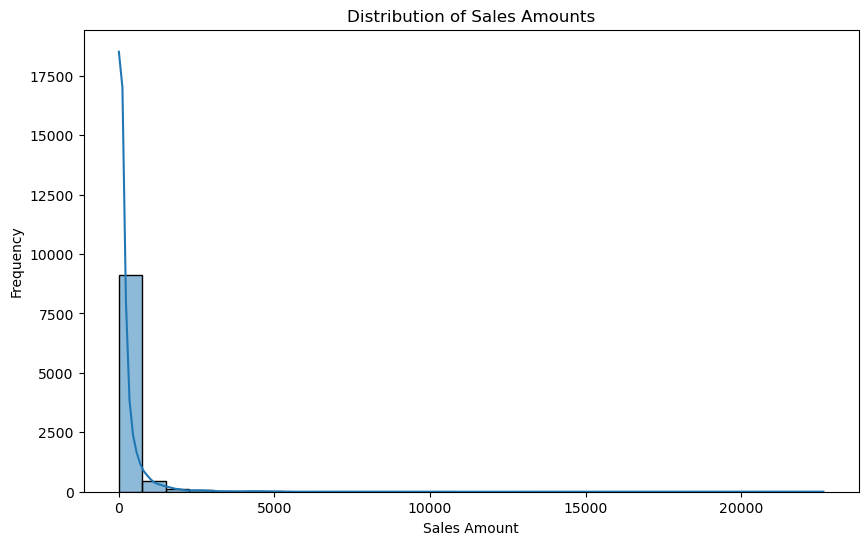

In [33]:
# Distribution of sales amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

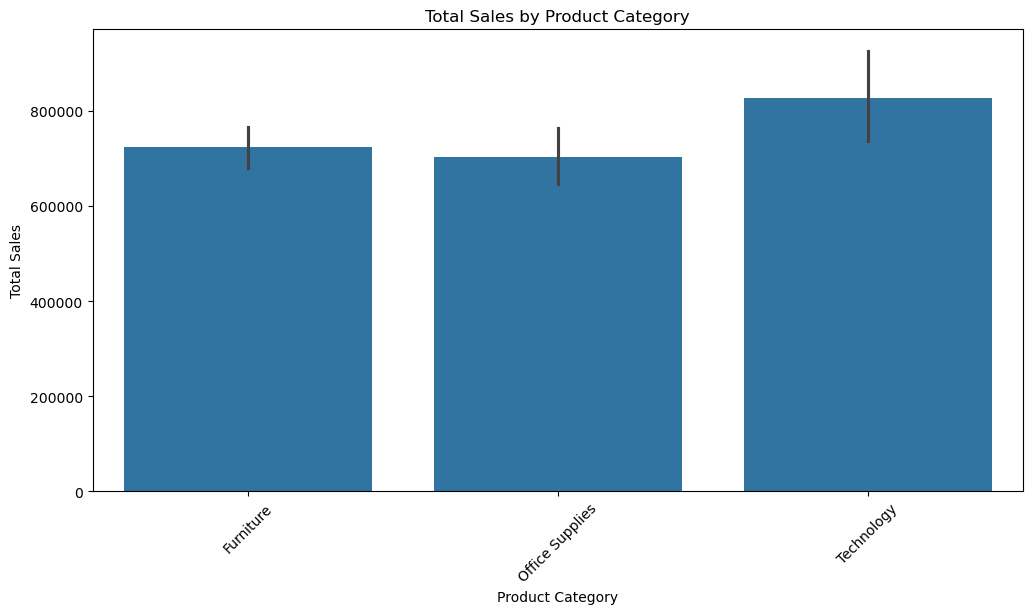

In [35]:
# Sales by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator='sum')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

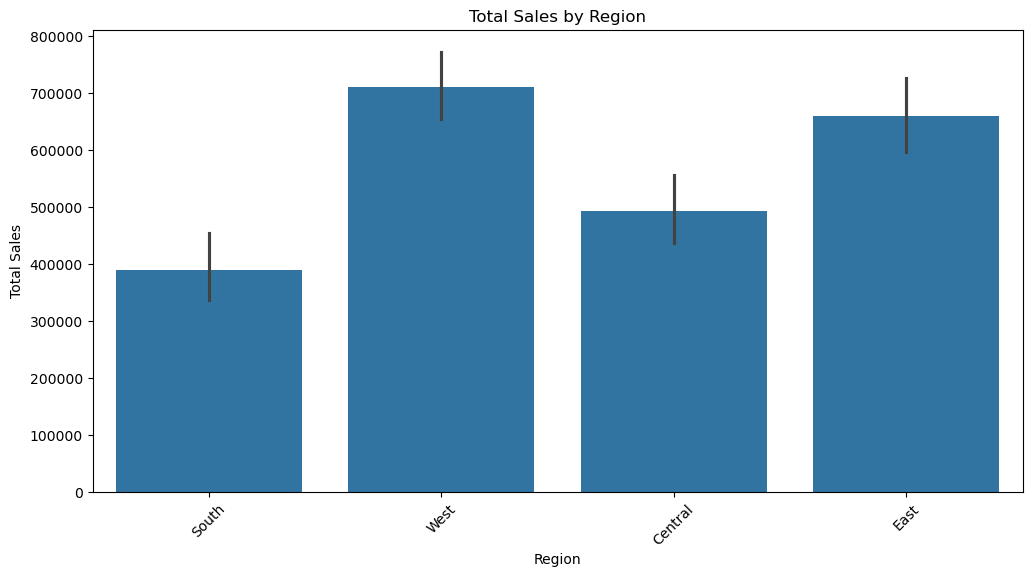

In [37]:
# Sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator='sum')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17820\2649834582.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Sales'].resample('M').sum().plot()


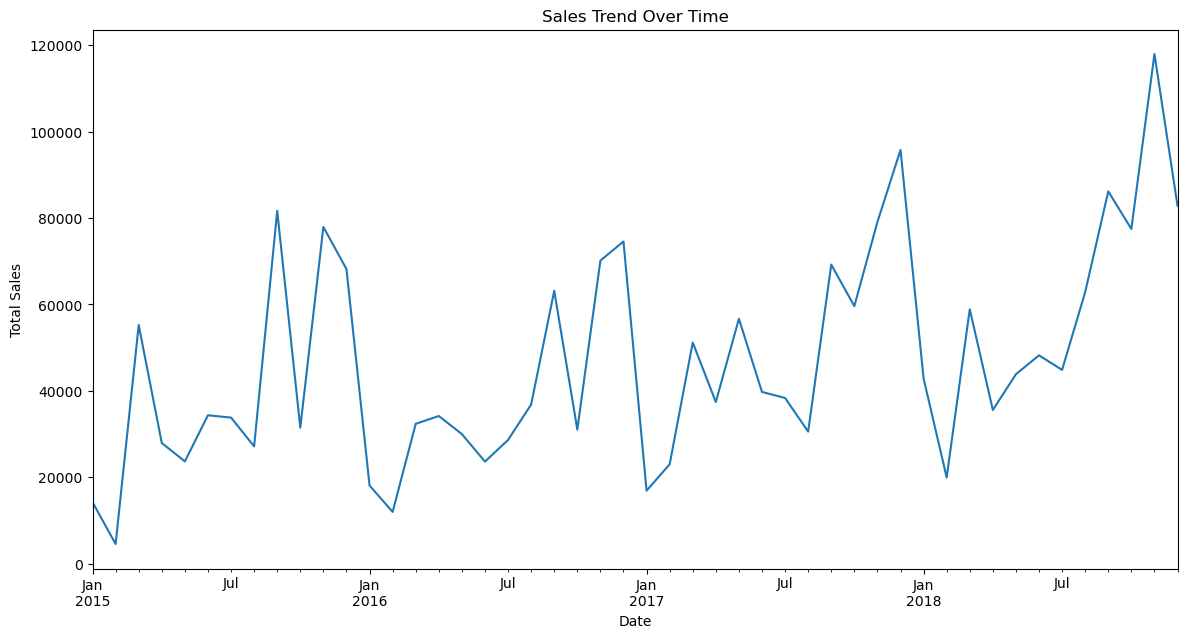

In [39]:
# Trends over time
df.set_index('Order Date', inplace=True)
plt.figure(figsize=(14, 7))
df['Sales'].resample('M').sum().plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [41]:
# Key Insights

# Top-selling product categories
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("\nTop-selling Product Categories:\n", top_categories)

# Top-selling regions
top_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nTop-selling Regions:\n", top_regions)

# Seasonal trends (monthly and yearly)
monthly_sales = df['Sales'].resample('M').sum()
print("\nMonthly Sales Summary:\n", monthly_sales.head())

yearly_sales = df['Sales'].resample('Y').sum()
print("\nYearly Sales Summary:\n", yearly_sales.head())


Top-selling Product Categories:
 Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64

Top-selling Regions:
 Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

Monthly Sales Summary:
 Order Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64

Yearly Sales Summary:
 Order Date
2015-12-31    479856.2081
2016-12-31    454315.9054
2017-12-31    597225.4900
2018-12-31    721209.8092
Freq: YE-DEC, Name: Sales, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_17820\1782707903.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()
C:\Users\DELL\AppData\Local\Temp\ipykernel_17820\1782707903.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = df['Sales'].resample('Y').sum()
